In [1]:
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations


In [4]:
df = pd.read_csv(r"C:\Users\balam\Downloads\scrap_waste_data.csv")
df.head()


,Machine_ID,Operator_ID,Material_Type,Production_Quantity,Scrap_Quantity,Scrap_Reason,Timestamp
0,M003,O105,Plastic,728,98,Surface Defect,2024-01-02 00:01:00
1,M002,O101,Copper,721,36,Operator Error,2024-01-02 00:05:00
2,M001,O102,Copper,973,98,Contamination,2024-01-02 07:25:00
3,M001,O106,Brass,808,98,Operator Error,2024-01-01 11:35:00
4,M005,O108,Steel,503,73,Machine Malfunction,2024-01-02 03:35:00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Machine_ID           1000 non-null   object
 1   Operator_ID          1000 non-null   object
 2   Material_Type        1000 non-null   object
 3   Production_Quantity  1000 non-null   int64 
 4   Scrap_Quantity       1000 non-null   int64 
 5   Scrap_Reason         1000 non-null   object
 6   Timestamp            1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [6]:
df.isnull().sum()


Machine_ID             0
Operator_ID            0
Material_Type          0
Production_Quantity    0
Scrap_Quantity         0
Scrap_Reason           0
Timestamp              0
dtype: int64

In [7]:
df.describe()


,Production_Quantity,Scrap_Quantity
count,1000.000000,1000.000000
mean,739.524000,56.403000
std,147.472131,26.237893
min,500.000000,10.000000
25%,611.000000,34.750000
50%,732.500000,57.000000
75%,869.000000,79.000000
max,1000.000000,100.000000


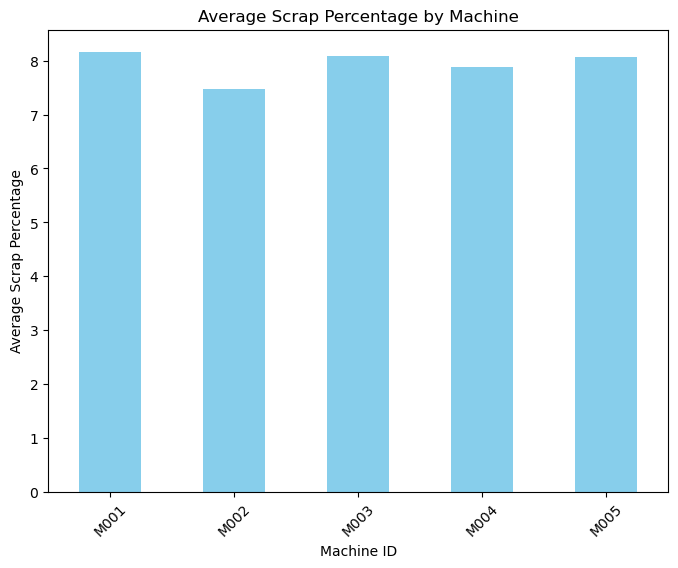

In [8]:
df['Scrap_Percentage'] = (df['Scrap_Quantity'] / df['Production_Quantity']) * 100

# Group by Machine_ID and calculate average scrap percentage
machine_scrap = df.groupby('Machine_ID')['Scrap_Percentage'].mean()

# Plotting
plt.figure(figsize=(8,6))
machine_scrap.plot(kind='bar', color='skyblue')
plt.title('Average Scrap Percentage by Machine')
plt.xlabel('Machine ID')
plt.ylabel('Average Scrap Percentage')
plt.xticks(rotation=45)
plt.show()


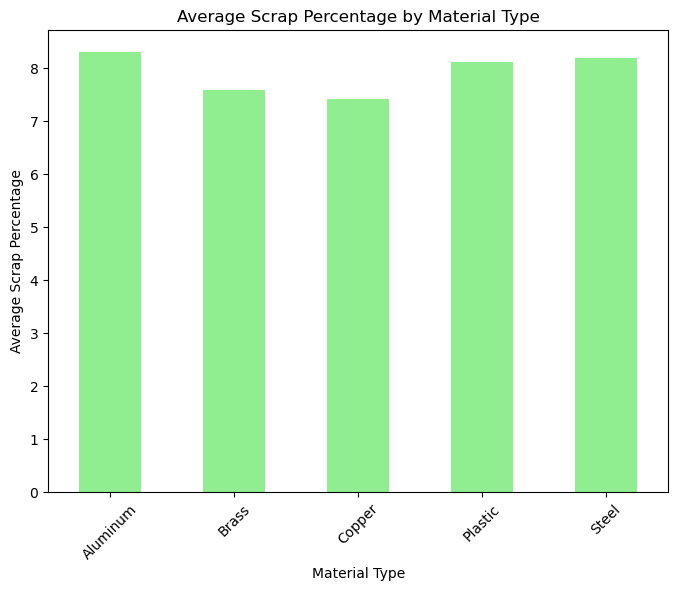

In [9]:
material_scrap = df.groupby('Material_Type')['Scrap_Percentage'].mean()

# Plotting
plt.figure(figsize=(8,6))
material_scrap.plot(kind='bar', color='lightgreen')
plt.title('Average Scrap Percentage by Material Type')
plt.xlabel('Material Type')
plt.ylabel('Average Scrap Percentage')
plt.xticks(rotation=45)
plt.show()


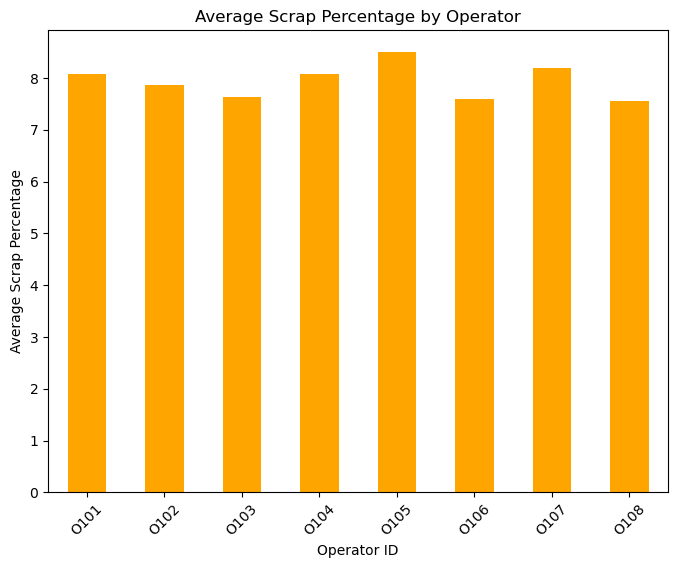

In [10]:
operator_scrap = df.groupby('Operator_ID')['Scrap_Percentage'].mean()

# Plotting
plt.figure(figsize=(8,6))
operator_scrap.plot(kind='bar', color='orange')
plt.title('Average Scrap Percentage by Operator')
plt.xlabel('Operator ID')
plt.ylabel('Average Scrap Percentage')
plt.xticks(rotation=45)
plt.show()


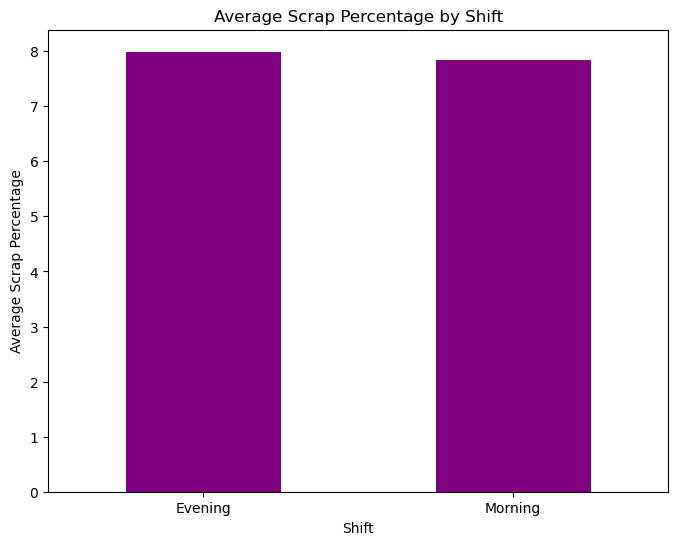

In [12]:
# Convert Timestamp column to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create the Shift column based on the hour of the day
df['Shift'] = df['Timestamp'].apply(lambda x: 'Morning' if 8 <= x.hour < 16 else 'Evening')

# Calculate average Scrap Percentage by Shift
shift_scrap = df.groupby('Shift')['Scrap_Percentage'].mean()

# Plotting the results
plt.figure(figsize=(8,6))
shift_scrap.plot(kind='bar', color='purple')
plt.title('Average Scrap Percentage by Shift')
plt.xlabel('Shift')
plt.ylabel('Average Scrap Percentage')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


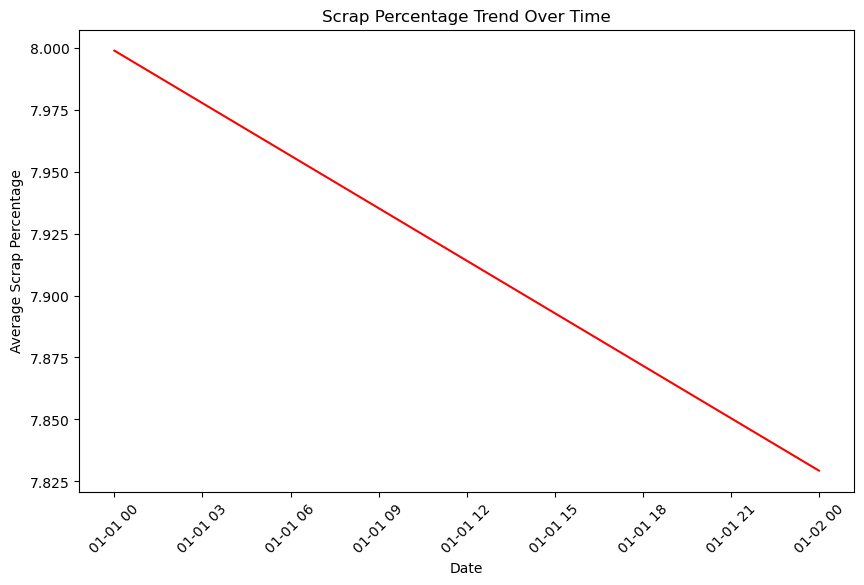

In [13]:
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
daily_scrap = df.groupby('Date')['Scrap_Percentage'].mean()

# Plotting
plt.figure(figsize=(10,6))
daily_scrap.plot(kind='line', color='red')
plt.title('Scrap Percentage Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Scrap Percentage')
plt.xticks(rotation=45)
plt.show()


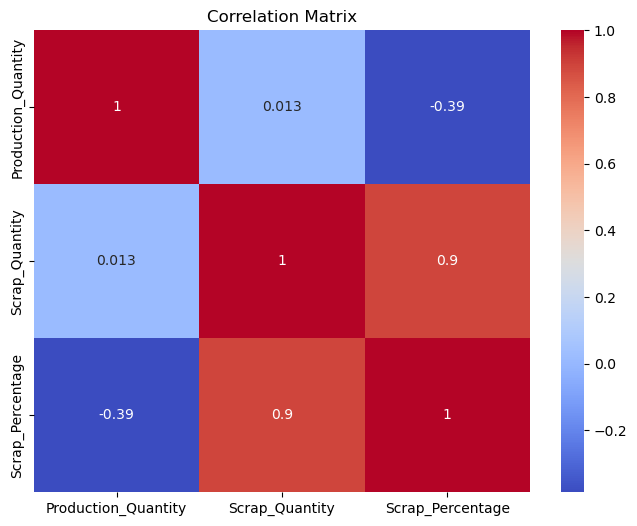

In [15]:
# Ensure only numeric columns are used for correlation
numeric_df = df.select_dtypes(include=['number'])

# Handle missing values (optional but recommended)
numeric_df.fillna(0, inplace=True)  # Replace missing values with 0

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

